In [36]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [37]:
for i in [f"darks.{i:0>8}.DARK.FIT" for i in range (2604,2624)]:

    print(i)

for i in [f"flats.{i:0>8}.FIT" for i in range (2625,2635)]:
    print(i)

for i in [f"science_{i}.fits" for i in range (1,4)]:
    print(i)

darks.00002604.DARK.FIT
darks.00002605.DARK.FIT
darks.00002606.DARK.FIT
darks.00002607.DARK.FIT
darks.00002608.DARK.FIT
darks.00002609.DARK.FIT
darks.00002610.DARK.FIT
darks.00002611.DARK.FIT
darks.00002612.DARK.FIT
darks.00002613.DARK.FIT
darks.00002614.DARK.FIT
darks.00002615.DARK.FIT
darks.00002616.DARK.FIT
darks.00002617.DARK.FIT
darks.00002618.DARK.FIT
darks.00002619.DARK.FIT
darks.00002620.DARK.FIT
darks.00002621.DARK.FIT
darks.00002622.DARK.FIT
darks.00002623.DARK.FIT
flats.00002625.FIT
flats.00002626.FIT
flats.00002627.FIT
flats.00002628.FIT
flats.00002629.FIT
flats.00002630.FIT
flats.00002631.FIT
flats.00002632.FIT
flats.00002633.FIT
flats.00002634.FIT
science_1.fits
science_2.fits
science_3.fits


In [38]:
# hdulist = fits.open("science_1.fits")
# hdulist = fits.open("science_2.fits")
hdulist = fits.open("science_3.fits")
print(hdulist[0].header ["EXPTIME"])
print(hdulist[0].header ["CCD-TEMP"])
#The exposure time & temp


2.0
-9.787817267812


In [39]:
for i in [f"darks.{i:0>8}.DARK.FIT" for i in range (2604,2624)]:
    hdulist=fits.open(i)
    print(hdulist[0].header ["EXPTIME"])
    #print(hdulist[0].header)
    print(hdulist[0].header ["CCD-TEMP"] )
    #They all work 

2.0
-10.20308403674
2.0
-9.787817267812
2.0
-10.20308403674
2.0
-9.787817267812
2.0
-9.787817267812
2.0
-10.20308403674
2.0
-10.20308403674
2.0
-9.787817267812
2.0
-10.20308403674
2.0
-10.20308403674
2.0
-10.20308403674
2.0
-9.787817267812
2.0
-10.20308403674
2.0
-10.20308403674
2.0
-9.787817267812
2.0
-9.787817267812
2.0
-9.787817267812
2.0
-9.787817267812
2.0
-10.20308403674
2.0
-9.787817267812


[array([[201, 151, 151, ..., 100,  99, 101],
       [187, 161, 136, ...,  93, 121, 102],
       [148, 148, 149, ..., 113, 100, 107],
       ...,
       [107, 125, 119, ..., 106, 101, 103],
       [122, 127, 120, ..., 103, 109, 106],
       [114, 117, 112, ..., 110, 104, 109]], dtype=uint16), array([[203, 160, 169, ..., 113, 118, 102],
       [172, 162, 159, ..., 108, 104, 111],
       [178, 152, 151, ..., 109, 104, 109],
       ...,
       [114, 109, 115, ..., 103, 100, 118],
       [117, 122, 128, ..., 108, 113, 107],
       [117, 118, 114, ..., 107, 105, 118]], dtype=uint16), array([[186, 171, 171, ..., 104, 108, 107],
       [186, 167, 155, ..., 100, 114,  92],
       [159, 159, 149, ...,  98, 102, 112],
       ...,
       [117, 119, 118, ..., 101, 108, 100],
       [119, 119, 110, ...,  99, 108,  99],
       [122, 129, 110, ...,  98, 118, 100]], dtype=uint16), array([[181, 173, 152, ..., 112, 102, 107],
       [186, 164, 141, ..., 102, 106,  93],
       [189, 151, 147, ..., 105, 10

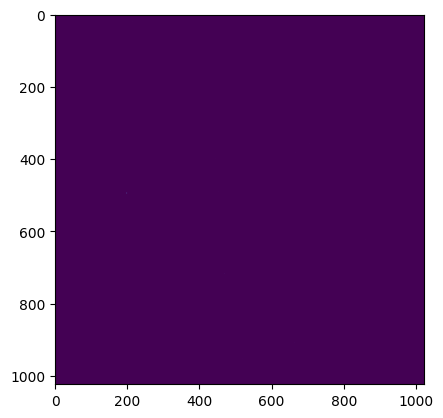

In [46]:

# Template for the file names (with placeholder for frame number)
dark_frames_data=[]
for path in [f"darks.{i:0>8}.DARK.FIT" for i in range (2604,2624)]:
    with fits.open(path) as hdul:
        dark_frames_data.append(hdul[0].data)
    
print(dark_frames_data)
master_dark_frame = np.median(dark_frames_data, axis=0)
plt.imshow(master_dark_frame)
    
    


In [41]:
outfile = 'median_dark.fits'

hdu = fits.PrimaryHDU(master_dark_frame)
hdu.writeto(outfile, overwrite=True)
print(np.mean(master_dark_frame))

106.75873374938965


In [42]:
for i in range(2625,2634):
    flat = fits.getdata(f'flats.0000{i}.FIT')
    print(f"Flat 0000{i} mean: {np.mean(flat)}")


Flat 00002625 mean: 32406.191054344177
Flat 00002626 mean: 32243.787157058716
Flat 00002627 mean: 32223.986525535583
Flat 00002628 mean: 32330.513867378235
Flat 00002629 mean: 32345.540390968323
Flat 00002630 mean: 32337.68927192688
Flat 00002631 mean: 32371.462470054626
Flat 00002632 mean: 32333.615273475647
Flat 00002633 mean: 32273.858921051025


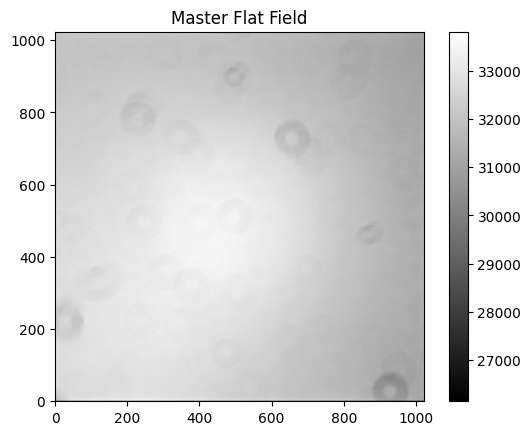

In [43]:
# Find the mode of the master flat (approximate using the most common pixel value):

flat_frames = [fits.getdata(f'flats.0000{i}.FIT') for i in range(2625,2634)]
master_flat = np.median(flat_frames, axis=0)
fits.writeto('masterflat.fits', master_flat, overwrite=True)

plt.imshow(master_flat, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Master Flat Field')
plt.show()

Mode of master flat: 32892


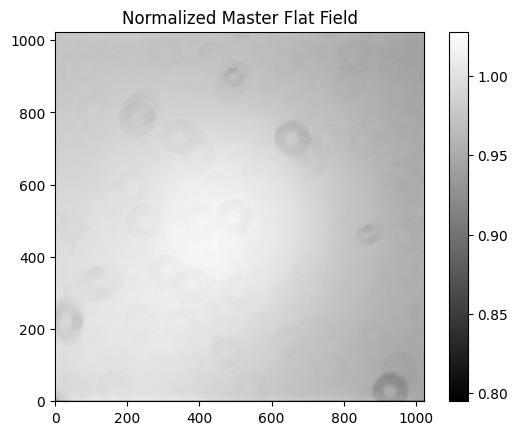

In [44]:

# 5 c
# Output the Mode of the Master Flat and Save the Normalized Flat:

mode_flat = np.bincount(master_flat.flatten().astype(int)).argmax()
print(f"Mode of master flat: {mode_flat}")
master_flat_normalized = master_flat / mode_flat
fits.writeto('masterflat_normalized.fits', master_flat_normalized, overwrite=True)
# Plotting the normalized master flat
plt.imshow(master_flat_normalized, cmap='gray', origin='lower')
plt.colorbar()
plt.title('Normalized Master Flat Field')
plt.show()


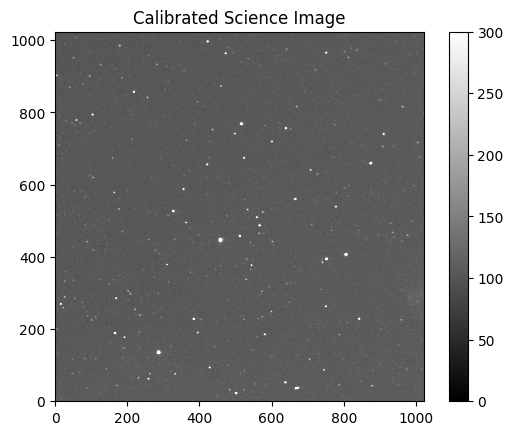

In [45]:
# Load science image
science = fits.getdata('science_3.fits')

# Subtract master dark and divide by normalized master flat
science_calibrated = (science - master_dark_frame) / master_flat_normalized

# Save the calibrated science image
fits.writeto('science_calibrated.fits', science_calibrated, overwrite=True)

# Plot the calibrated science image
plt.imshow(science_calibrated, cmap='gray', origin='lower',vmin=0,vmax=300)
plt.colorbar()
plt.title('Calibrated Science Image')
plt.show()
